In [1]:
import numpy as np
from scipy.constants import G
from scipy.integrate import quad
import matplotlib.pyplot as plt

## Planet

In [10]:
# Planet
rho_planet = 7874 # Dichte Eisen (kg / m^3)
R_planet = 5700e3 # Radius (m)
V_planet = 4./3. * np.pi * R_planet**3
M_planet = rho_planet * V_planet # Masse (kg)
T_planet =  24 * 60 * 60# Länge eines Tages (Dauer einer Umdrehung) (s)
omega_planet = 2.*np.pi/T_planet # Winkelgeschwindigkeit

## Geostationärer Satelit

Wir ermitteln die Höhe des geostationären Sateliten.
$$F_{\text G} (r) = \frac{G mM}{r^2}$$

$$
F_{\text Z} (r) = \frac{m v^2 }{ r } = m r \omega^2
$$

$$
F_{\text Z} (R_{\text{stat}})
\overset{!}{=}
F_{\text G} (R_{\text{stat}})
\quad \Rightarrow \quad
R_{\text{stat}}
=
\sqrt[3]{\frac{MG}{\omega^2}}
$$

In [12]:
M_sat = 235 # Masse (kg)

In [36]:
R_sat =  1.1*R_planet # ((G * M_planet)/(omega_planet**2))**(1./3.) # (m)
v_sat = R_sat * omega_planet # (m/s)

In [37]:
print(f'Der Satelit ist {R_sat:.3} m vom Zentrum des Planeten und {R_sat - R_planet:.3} m von der Oberfläche des Planeten entfernt.')

Der Satelit ist 6.27e+06 m vom Zentrum des Planeten und 5.7e+05 m von der Oberfläche des Planeten entfernt.


## Meteorit

In [49]:
M_met = M_sat # Masse des Meteoriten (kg)
v_met = 0.9 * v_sat # Geschwindigkeit des Meteoriten (m/s)

## Meteorit und Satelit

Nach dem vollkommen unelastischen Stoss haben wir (Impulserhaltung):

$$
v_{\text{tot}} = \frac{m_\text{sat} v_\text{sat} - m_\text{met} v_\text{met}}{m_{\text{tot}}}.
$$

In [50]:
M_tot = M_met + M_sat
v_tot_0 = (M_sat * v_sat - M_met * v_met)/(M_tot)
theta_prime_0 = v_tot_0 / R_sat

print(f'Der Satelit und der Meteorit bewegen sich nach dem Stoss mit {v_tot_0} m/s.')

Der Satelit und der Meteorit bewegen sich nach dem Stoss mit 22.798363354175905 m/s.


In [56]:
k = G*M_planet

def potential(r):
    return - k/r

def angular_momentum(r, theta_prime):
    return M_tot * r**2 * theta_prime

def energy(r, r_prime, theta_prime):
    V = potential(r)
    l = angular_momentum(r, theta_prime)
    return 0.5 * M_tot * r_prime**2 + 0.5 * l**2/(M_tot*r**2) + V

## Anfangsbedignungen

In [57]:
E = energy(r=R_sat, r_prime=0., theta_prime=theta_prime_0)
l = angular_momentum(r=R_sat, theta_prime=theta_prime_0)

a = -k / (2. * E)


print(E)

def integrand(r):
    return 1/r**2 * 1/np.sqrt(
        2.*M_tot * E / l**2
        -
        2.*M_tot * potential(r) / l**2 
        -
        1./r**2
    )

-64897825.85974558


/tmp/ipykernel_15780/3541400502.py:5: RuntimeWarning: invalid value encountered in sqrt
  return 1/r**2 * 1/np.sqrt(


(-0.027464724939457057, 4.4079077853032e-09)

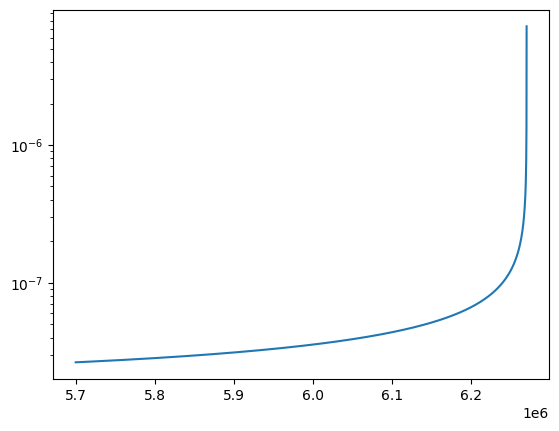

In [53]:
xs = np.linspace(R_sat, R_planet, 100000)
plt.semilogy(xs, integrand(xs))

quad(func=integrand, a=R_sat, b=R_planet)